# Análise do Impacto da COVID-19 nos Cânceres de Pulmão (CID-10 C34) e de Sangue (CID-10 C91 e C92) nas Principais Cidades de São Paulo

### Introdução:

O câncer de pulmão é a principal causa de mortes relacionada ao câncer em todo o mundo, de acordo com a Organização Mundial da Saúde (World Health Organization, em inglês), e é o terceiro mais comum em homens e o quarto mais comum em mulheres no Brasil, de acordo com o Instituto Nacional de Câncer (INCA). Recentemente, o mundo enfrentou uma pandemia que mudou a realidade que conhecíamos em diversos aspectos, deixando números alarmantes. O estudo do impacto da COVID-19 nos cânceres de pulmão e de sangue se faz necessário para o combate ao agravamento da situação decorrente dessa relação.

### Objetivo:
Será realizada uma análise em um conjunto de dados que fornece um registro abrangente de informações, incluindo a ocorrência de condições médicas específicas (C34, C91, C92 e U07.1) nas cidades de São Paulo, Guarulhos e Campinas. O objetivo é estudar o impacto da pandemia de COVID-19 (U07.1) nos cânceres de pulmão (C34) e nos cânceres de sangue (C91 e C92).

# Coleta dos Dados:

- Os conjuntos de dados fornecem um registro abrangente de dados históricos que inclui a incidência de condições médicas específicas (CID-10 C34, C91 e C92) nas cidades de São Paulo, Guarulhos e Campinas.

- Os conjuntos de dados abrangem dois períodos distintos, fornecendo insights sobre a época pré-pandêmica (de janeiro de 2018 a fevereiro de 2020) e a época durante a pandemia (de março de 2020 a março de 2023).

[Fonte: Cancer/COVID-19 - São Paulo Metropolitan Area](https://www.kaggle.com/datasets/resendeacm/cancer-covid-sao-paulo-metropolitan-area)




In [1]:
# Baixando bíbliotecas que irei usar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
# Criando meus datasframes
dfCovidCampinas = pd.read_csv("/kaggle/input/cancer-covid-sao-paulo-metropolitan-area/cancer_covid_campinas.csv")
dfCovidGuarulhos = pd.read_csv("/kaggle/input/cancer-covid-sao-paulo-metropolitan-area/cancer_covid_guarulhos.csv")
dfCovidSaoPaulo = pd.read_csv("/kaggle/input/cancer-covid-sao-paulo-metropolitan-area/cancer_covid_sao_paulo.csv")


# Limpeza e Preparação dos Dados:


In [3]:
print("Guarulhos\n")
dfCovidGuarulhos

Guarulhos



,month_year,C34,C91,C92,U07.1
0,01-2018,0,0,2,-
1,02-2018,0,1,1,-
2,03-2018,0,2,2,-
3,04-2018,1,1,1,-
4,05-2018,1,0,3,-
...,...,...,...,...,...
58,11-2022,2,2,3,501
59,12-2022,3,4,1,9122
60,01-2023,1,0,1,5336
61,02-2023,0,1,1,1854


In [4]:
print("Campinas\n")
dfCovidCampinas

Campinas



,month_year,C34,C91,C92,U07.1
0,01-2018,5,1,2,-
1,02-2018,3,0,1,-
2,03-2018,7,0,2,-
3,04-2018,4,0,2,-
4,05-2018,5,1,1,-
...,...,...,...,...,...
58,11-2022,12,2,3,3673
59,12-2022,3,2,1,5376
60,01-2023,7,2,1,4795
61,02-2023,6,1,0,5651


In [5]:
print('São Paulo\n')
dfCovidSaoPaulo

São Paulo



,month_year,C34,C91,C92,U07.1
0,01-2018,31,9,13,-
1,02-2018,21,9,19,-
2,03-2018,29,13,15,-
3,04-2018,24,6,17,-
4,05-2018,66,21,18,-
...,...,...,...,...,...
58,11-2022,27,5,15,6999
59,12-2022,41,9,15,6757
60,01-2023,14,16,17,4180
61,02-2023,26,8,10,6352


In [6]:
print("Número de linhas e colunas dfCovidGuarulhos: ", dfCovidGuarulhos.shape)
print("Número de linhas e colunas dfCovidCampinas: ", dfCovidCampinas.shape)
print("Número de linhas e colunas dfCovidSaoPaulo: ", dfCovidSaoPaulo.shape)

Número de linhas e colunas dfCovidGuarulhos:  (63, 5)
Número de linhas e colunas dfCovidCampinas:  (63, 5)
Número de linhas e colunas dfCovidSaoPaulo:  (63, 5)


In [7]:
print("Número de valores nulos em cada coluna dfCovidGuarulhos:\n")
dfCovidGuarulhos.isnull().sum()

Número de valores nulos em cada coluna dfCovidGuarulhos:



month_year    0
C34           0
C91           0
C92           0
U07.1         0
dtype: int64

In [8]:
print('Número de valores nulos em cada coluna dfCovidCampinas:\n')
dfCovidCampinas.isnull().sum()

Número de valores nulos em cada coluna dfCovidCampinas:



month_year    0
C34           0
C91           0
C92           0
U07.1         0
dtype: int64

In [9]:
print('Número de valores nulos em cada coluna:\n')
dfCovidSaoPaulo.isnull().sum()

Número de valores nulos em cada coluna:



month_year    0
C34           0
C91           0
C92           0
U07.1         0
dtype: int64

In [10]:
print("Número de valores únicos em cada coluna dfCovidGuarulhos\n")
print('Colunas month_year:\n')
np.unique(dfCovidGuarulhos['month_year'], return_counts=True)

Número de valores únicos em cada coluna dfCovidGuarulhos

Colunas month_year:



(array(['01-2018', '01-2019', '01-2020', '01-2021', '01-2022', '01-2023',
        '02-2018', '02-2019', '02-2020', '02-2021', '02-2022', '02-2023',
        '03-2018', '03-2019', '03-2020', '03-2021', '03-2022', '03-2023',
        '04-2018', '04-2019', '04-2020', '04-2021', '04-2022', '05-2018',
        '05-2019', '05-2020', '05-2021', '05-2022', '06-2018', '06-2019',
        '06-2020', '06-2021', '06-2022', '07-2018', '07-2019', '07-2020',
        '07-2021', '07-2022', '08-2018', '08-2019', '08-2020', '08-2021',
        '08-2022', '09-2018', '09-2019', '09-2020', '09-2021', '09-2022',
        '10-2018', '10-2019', '10-2020', '10-2021', '10-2022', '11-2018',
        '11-2019', '11-2020', '11-2021', '11-2022', '12-2018', '12-2019',
        '12-2020', '12-2021', '12-2022'], dtype=object),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [11]:
print('Colunas C34:\n')
np.unique(dfCovidGuarulhos['C34'], return_counts=True)

Colunas C34:



(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([10, 15, 12, 12,  5,  2,  4,  2,  1]))

In [12]:
print('Colunas C91:\n')
np.unique(dfCovidGuarulhos['C91'], return_counts=True)


Colunas C91:



(array([0, 1, 2, 3, 4]), array([19, 25, 11,  5,  3]))

In [13]:
print('Colunas C92:\n')
np.unique(dfCovidGuarulhos['C92'], return_counts=True)


Colunas C92:



(array([0, 1, 2, 3, 6]), array([14, 30, 13,  5,  1]))

In [14]:
print('Colunas U07:\n')
np.unique(dfCovidGuarulhos['U07.1'], return_counts=True)

Colunas U07:



(array(['-', '115', '116', '1193', '1303', '1331', '1689', '1762', '1846',
        '1854', '2020', '21', '2387', '2400', '247', '2729', '2813',
        '2880', '2955', '3041', '4086', '4285', '4363', '4398', '4607',
        '501', '504', '5336', '5408', '5845', '633', '701', '716', '742',
        '823', '8614', '9122', '9281'], dtype=object),
 array([26,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1]))

In [15]:
print("Número de valores únicos em cada coluna dfCovidCampinas\n")
print('Colunas month_year:\n')
np.unique(dfCovidCampinas['month_year'], return_counts=True)

Número de valores únicos em cada coluna dfCovidCampinas

Colunas month_year:



(array(['01-2018', '01-2019', '01-2020', '01-2021', '01-2022', '01-2023',
        '02-2018', '02-2019', '02-2020', '02-2021', '02-2022', '02-2023',
        '03-2018', '03-2019', '03-2020', '03-2021', '03-2022', '03-2023',
        '04-2018', '04-2019', '04-2020', '04-2021', '04-2022', '05-2018',
        '05-2019', '05-2020', '05-2021', '05-2022', '06-2018', '06-2019',
        '06-2020', '06-2021', '06-2022', '07-2018', '07-2019', '07-2020',
        '07-2021', '07-2022', '08-2018', '08-2019', '08-2020', '08-2021',
        '08-2022', '09-2018', '09-2019', '09-2020', '09-2021', '09-2022',
        '10-2018', '10-2019', '10-2020', '10-2021', '10-2022', '11-2018',
        '11-2019', '11-2020', '11-2021', '11-2022', '12-2018', '12-2019',
        '12-2020', '12-2021', '12-2022'], dtype=object),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [16]:
print('Colunas C34:\n')
np.unique(dfCovidCampinas['C34'], return_counts=True)

Colunas C34:



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 15, 20, 23]),
 array([ 1,  2,  4,  4, 11,  8,  9,  8,  5,  4,  2,  1,  1,  1,  1,  1]))

In [17]:
print('Colunas C91:\n')
np.unique(dfCovidCampinas['C91'], return_counts=True)

Colunas C91:



(array([0, 1, 2, 3]), array([17, 27, 16,  3]))

In [18]:
print('Colunas C92:\n')
np.unique(dfCovidCampinas['C92'], return_counts=True)

Colunas C92:



(array([0, 1, 2, 3, 4]), array([17, 26,  8, 10,  2]))

In [19]:
print('Colunas U07.1:\n')
np.unique(dfCovidCampinas['U07.1'], return_counts=True)

Colunas U07.1:



(array(['-', '10027', '13040', '1384', '15', '1855', '19218', '2064',
        '2581', '2777', '2895', '3343', '3462', '354', '3589', '3673',
        '405', '4364', '4795', '5376', '5651', '5686', '5813', '6267',
        '6455', '6586', '6675', '6812', '7394', '8373', '8385', '8779',
        '8799', '8812', '9146', '9271', '9446', '9722'], dtype=object),
 array([26,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1]))

In [20]:
print("Número de valores únicos em cada coluna dfCovidSaoPaulo\n")
print('Colunas month_year:\n')
np.unique(dfCovidSaoPaulo['month_year'], return_counts=True)

Número de valores únicos em cada coluna dfCovidSaoPaulo

Colunas month_year:



(array(['01-2018', '01-2019', '01-2020', '01-2021', '01-2022', '01-2023',
        '02-2018', '02-2019', '02-2020', '02-2021', '02-2022', '02-2023',
        '03-2018', '03-2019', '03-2020', '03-2021', '03-2022', '03-2023',
        '04-2018', '04-2019', '04-2020', '04-2021', '04-2022', '05-2018',
        '05-2019', '05-2020', '05-2021', '05-2022', '06-2018', '06-2019',
        '06-2020', '06-2021', '06-2022', '07-2018', '07-2019', '07-2020',
        '07-2021', '07-2022', '08-2018', '08-2019', '08-2020', '08-2021',
        '08-2022', '09-2018', '09-2019', '09-2020', '09-2021', '09-2022',
        '10-2018', '10-2019', '10-2020', '10-2021', '10-2022', '11-2018',
        '11-2019', '11-2020', '11-2021', '11-2022', '12-2018', '12-2019',
        '12-2020', '12-2021', '12-2022'], dtype=object),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [21]:
print('Colunas C34:\n')
np.unique(dfCovidSaoPaulo['C34'], return_counts=True)

Colunas C34:



(array([14, 21, 23, 24, 26, 27, 28, 29, 31, 33, 34, 35, 36, 37, 38, 39, 40,
        41, 42, 43, 44, 46, 47, 49, 50, 51, 52, 53, 54, 56, 57, 63, 64, 66,
        68, 69]),
 array([1, 2, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 2, 1, 2, 1, 7, 4, 3, 1, 1, 2,
        2, 1, 2, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1]))

In [22]:
print('Colunas C91:\n')
np.unique(dfCovidSaoPaulo['C91'], return_counts=True)

Colunas C91:



(array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 19,
        21, 22, 23]),
 array([1, 1, 1, 7, 6, 6, 7, 9, 4, 7, 3, 1, 1, 2, 1, 1, 1, 2, 1, 1]))

In [23]:
print('Colunas C92:\n')
np.unique(dfCovidSaoPaulo['C92'], return_counts=True)

Colunas C92:



(array([ 0,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 25]),
 array([1, 1, 1, 2, 4, 4, 8, 8, 6, 5, 9, 3, 4, 4, 2, 1]))

In [24]:
print('Colunas U07.1:\n')
np.unique(dfCovidSaoPaulo['U07.1'], return_counts=True)

Colunas U07.1:



(array(['-', '13564', '16264', '16725', '1885', '21065', '22861', '23147',
        '2358', '24903', '32942', '34118', '36076', '38109', '4180',
        '41982', '4877', '48920', '51806', '55201', '5554', '60389',
        '6328', '6352', '6409', '64530', '66988', '6757', '67939', '6999',
        '70441', '71972', '7426', '7705', '8251', '8533', '94539', '99264'],
       dtype=object),
 array([26,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1]))

In [25]:
dfCovidGuarulhos["U07.1"] = dfCovidGuarulhos['U07.1'].replace("-", 0).astype(int)
dfCovidCampinas["U07.1"] = dfCovidCampinas['U07.1'].replace("-", 0).astype(int)
dfCovidSaoPaulo["U07.1"] = dfCovidSaoPaulo['U07.1'].replace("-", 0).astype(int)

In [26]:
print('Valores únicos dfCovidGuarulhos da coluna U07.1 corrigidos (valores "-" foram substituídos por 0):\n')
np.unique(dfCovidGuarulhos["U07.1"], return_counts=True)

Valores únicos dfCovidGuarulhos da coluna U07.1 corrigidos (valores "-" foram substituídos por 0):



(array([   0,   21,  115,  116,  247,  501,  504,  633,  701,  716,  742,
         823, 1193, 1303, 1331, 1689, 1762, 1846, 1854, 2020, 2387, 2400,
        2729, 2813, 2880, 2955, 3041, 4086, 4285, 4363, 4398, 4607, 5336,
        5408, 5845, 8614, 9122, 9281]),
 array([26,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1]))

In [27]:
print('Valores únicos dfCovidCampinas da coluna U07.1 corrigidos (valores "-" foram substituídos por 0):\n')
np.unique(dfCovidCampinas["U07.1"], return_counts=True)

Valores únicos dfCovidCampinas da coluna U07.1 corrigidos (valores "-" foram substituídos por 0):



(array([    0,    15,   354,   405,  1384,  1855,  2064,  2581,  2777,
         2895,  3343,  3462,  3589,  3673,  4364,  4795,  5376,  5651,
         5686,  5813,  6267,  6455,  6586,  6675,  6812,  7394,  8373,
         8385,  8779,  8799,  8812,  9146,  9271,  9446,  9722, 10027,
        13040, 19218]),
 array([26,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1]))

In [28]:
print('Valores únicos dfCovidSaoPaulo da coluna U07.1 corrigidos (valores "-" foram substituídos por 0):\n')
np.unique(dfCovidSaoPaulo["U07.1"], return_counts=True)

Valores únicos dfCovidSaoPaulo da coluna U07.1 corrigidos (valores "-" foram substituídos por 0):



(array([    0,  1885,  2358,  4180,  4877,  5554,  6328,  6352,  6409,
         6757,  6999,  7426,  7705,  8251,  8533, 13564, 16264, 16725,
        21065, 22861, 23147, 24903, 32942, 34118, 36076, 38109, 41982,
        48920, 51806, 55201, 60389, 64530, 66988, 67939, 70441, 71972,
        94539, 99264]),
 array([26,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1]))

# Análise Descritiva: 

In [29]:
print("Informações dfCovidGuarulhos:\n")
dfCovidGuarulhos.info();

Informações dfCovidGuarulhos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   month_year  63 non-null     object
 1   C34         63 non-null     int64 
 2   C91         63 non-null     int64 
 3   C92         63 non-null     int64 
 4   U07.1       63 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.6+ KB


In [30]:
print('Informações dfCovidCampinas:\n')
dfCovidCampinas.info();

Informações dfCovidCampinas:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   month_year  63 non-null     object
 1   C34         63 non-null     int64 
 2   C91         63 non-null     int64 
 3   C92         63 non-null     int64 
 4   U07.1       63 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.6+ KB


In [31]:
print('Informações dfCovidSaoPaulo:\n')
dfCovidSaoPaulo.info();

Informações dfCovidSaoPaulo:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   month_year  63 non-null     object
 1   C34         63 non-null     int64 
 2   C91         63 non-null     int64 
 3   C92         63 non-null     int64 
 4   U07.1       63 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.6+ KB


In [32]:
print("Resumo estatístico dfCovidGuarulhos:\n")
dfCovidGuarulhos.describe()

Resumo estatístico dfCovidGuarulhos:



,C34,C91,C92,U07.1
count,63.000000,63.000000,63.000000,63.000000
mean,2.396825,1.174603,1.222222,1629.634921
std,1.988188,1.100435,1.054093,2344.778787
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000
50%,2.000000,1.000000,1.000000,504.000000
75%,3.000000,2.000000,2.000000,2564.500000
max,8.000000,4.000000,6.000000,9281.000000


In [33]:
print('Resumo estatístico dfCovidCampinas:\n')
dfCovidCampinas.describe()

Resumo estatístico dfCovidCampinas:



,C34,C91,C92,U07.1
count,63.000000,63.000000,63.000000,63.000000
mean,6.238095,1.079365,1.269841,3544.269841
std,3.929681,0.848178,1.124598,4203.602258
min,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000
50%,6.000000,1.000000,1.000000,2064.000000
75%,7.500000,2.000000,2.000000,6520.500000
max,23.000000,3.000000,4.000000,19218.000000


In [34]:
print('Resumo estatístico dfCovidSaoPaulo:\n')
dfCovidSaoPaulo.describe()

Resumo estatístico dfCovidSaoPaulo:



,C34,C91,C92,U07.1
count,63.000000,63.000000,63.000000,63.000000
mean,40.952381,9.634921,15.000000,18370.777778
std,12.301886,4.639597,3.818461,26297.996827
min,14.000000,1.000000,0.000000,0.000000
25%,33.500000,6.500000,13.000000,0.000000
50%,40.000000,9.000000,15.000000,6328.000000
75%,49.500000,11.000000,17.000000,28922.500000
max,69.000000,23.000000,25.000000,99264.000000


# Análise Estatística e Visualiazação dos Dados:

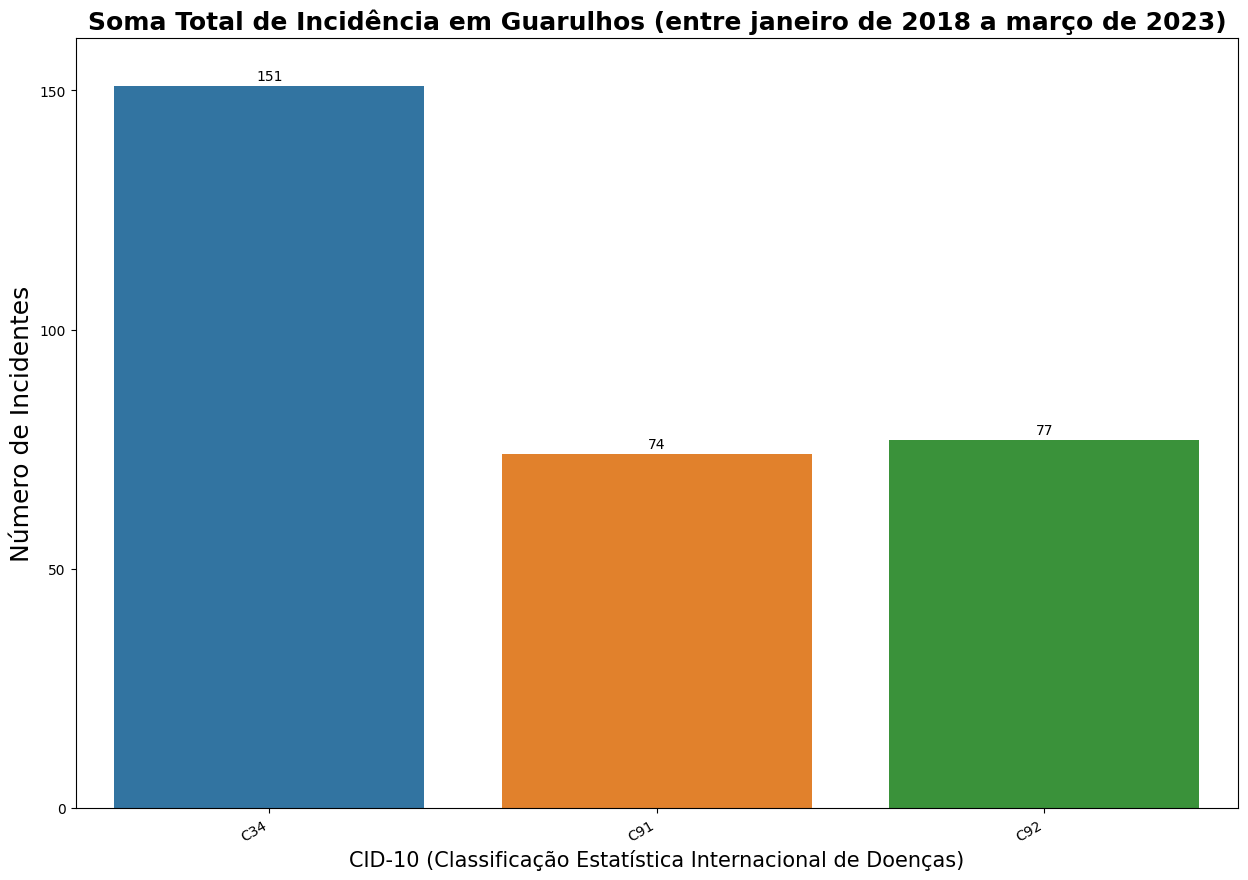

In [35]:
somaC34 = dfCovidGuarulhos['C34'].sum()
somaC91 = dfCovidGuarulhos['C91'].sum()
somaC92 = dfCovidGuarulhos['C92'].sum()

total_dfGuarulhos = pd.DataFrame({'Atributos': ['C34', 'C91', 'C92'],
                                 'Valores': [somaC34, somaC91, somaC92]})

plt.figure(figsize=(15, 10))
ax = sns.barplot(x='Atributos', y='Valores', data=total_dfGuarulhos)
ax.set_ylim(0, max(total_dfGuarulhos['Valores']) + 10)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(50))
plt.xticks(rotation=30, ha='right')
plt.title("Soma Total de Incidência em Guarulhos (entre janeiro de 2018 a março de 2023)", fontsize=18, fontweight='bold')
plt.xlabel("CID-10 (Classificação Estatística Internacional de Doenças)", fontsize=15)
plt.ylabel('Número de Incidentes', fontsize=18)
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height() + 2), ha='center', va='center', fontsize=10, color='black')


plt.show()

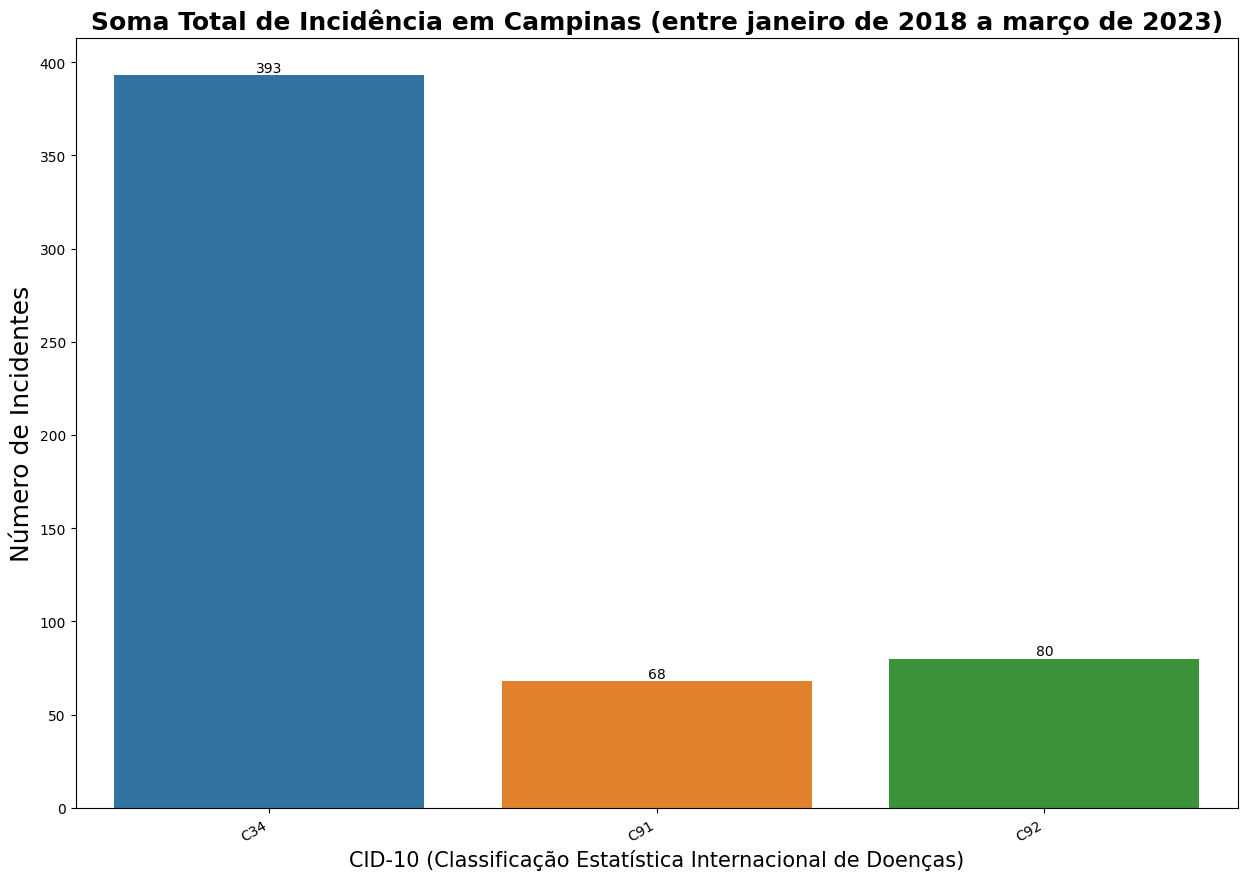

In [36]:
somaC34 = dfCovidCampinas['C34'].sum()
somaC91 = dfCovidCampinas['C91'].sum()
somaC92 = dfCovidCampinas['C92'].sum()

total_dfCampinas = pd.DataFrame({'Atributos': ['C34', 'C91', 'C92'],
                                 'Valores': [somaC34, somaC91, somaC92]})

plt.figure(figsize=(15, 10))
ax = sns.barplot(x='Atributos', y='Valores', data=total_dfCampinas)
ax.set_ylim(0, max(total_dfCampinas['Valores']) + 20)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(50))
plt.xticks(rotation=30, ha='right')
plt.title("Soma Total de Incidência em Campinas (entre janeiro de 2018 a março de 2023)", fontsize=18, fontweight='bold')
plt.xlabel("CID-10 (Classificação Estatística Internacional de Doenças)", fontsize=15)
plt.ylabel('Número de Incidentes', fontsize=18)
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height() + 4), ha='center', va='center', fontsize=10, color='black')


plt.show()

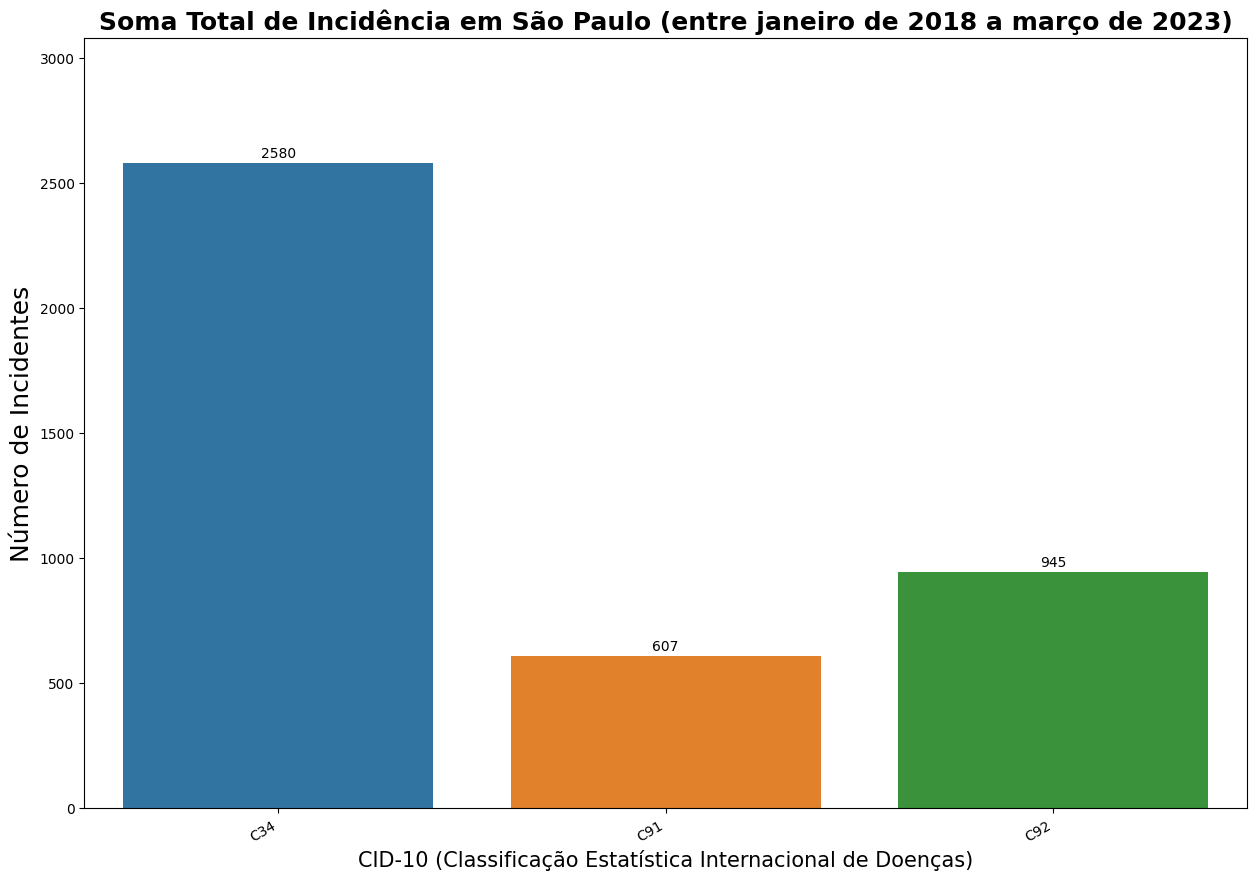

In [37]:
somaC34 = dfCovidSaoPaulo['C34'].sum()
somaC91 = dfCovidSaoPaulo['C91'].sum()
somaC92 = dfCovidSaoPaulo['C92'].sum()

total_dfSaoPaulo = pd.DataFrame({'Atributos': ['C34', 'C91', 'C92'],
                                 'Valores': [somaC34, somaC91, somaC92]})

plt.figure(figsize=(15, 10))
ax = sns.barplot(x='Atributos', y='Valores', data=total_dfSaoPaulo)
ax.set_ylim(0, max(total_dfSaoPaulo['Valores']) + 500)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(500))
plt.xticks(rotation=30, ha='right')
plt.title("Soma Total de Incidência em São Paulo (entre janeiro de 2018 a março de 2023)", fontsize=18, fontweight='bold')
plt.xlabel("CID-10 (Classificação Estatística Internacional de Doenças)", fontsize=15)
plt.ylabel('Número de Incidentes', fontsize=18)
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height() + 40), ha='center', va='center', fontsize=10, color='black')


plt.show()

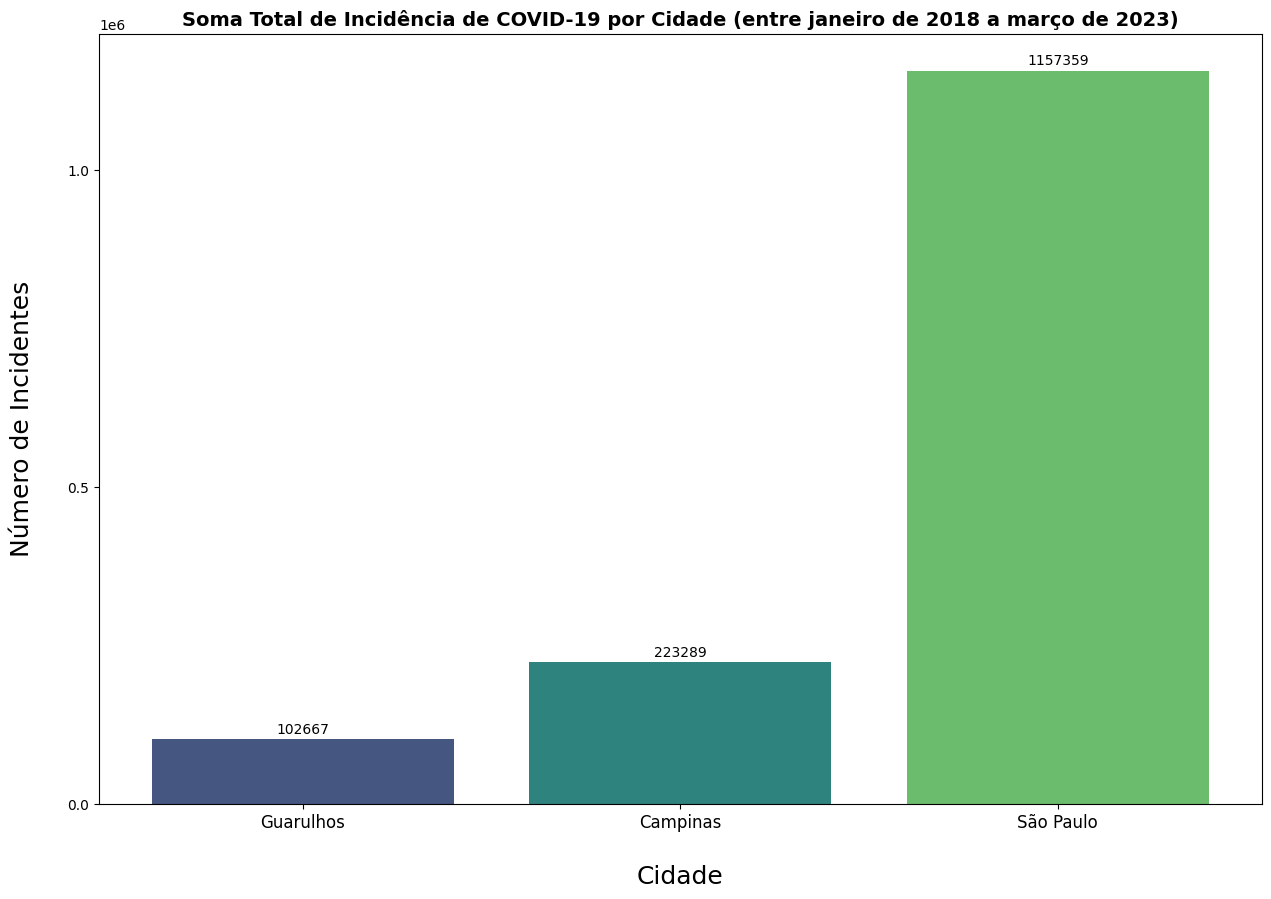

In [38]:
somaU07_1_Guarulhos = dfCovidGuarulhos['U07.1'].sum()
somaU07_1_Campinas = dfCovidCampinas['U07.1'].sum()
somaU07_1_SaoPaulo = dfCovidSaoPaulo['U07.1'].sum()

dfTotalCovidCidade = pd.DataFrame({'Atributos': ['Guarulhos', 'Campinas', 'São Paulo'],
                                 'Valores': [somaU07_1_Guarulhos, somaU07_1_Campinas, somaU07_1_SaoPaulo]})

plt.figure(figsize=(15, 10))
ax = sns.barplot(x='Atributos', y='Valores', data=dfTotalCovidCidade, palette='viridis', )
ax.set_ylim(0, 1500000)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(500000))
plt.xticks(rotation=0, fontsize=12)
plt.title("Soma Total de Incidência de COVID-19 por Cidade (entre janeiro de 2018 a março de 2023)", fontsize=14, fontweight='bold')
plt.xlabel("\nCidade", fontsize=18)
plt.ylabel('Número de Incidentes\n', fontsize=18)
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height() + 15000), ha='center', va='center', fontsize=10, color='black')
plt.autoscale()
plt.show()

<Figure size 1000x1000 with 0 Axes>

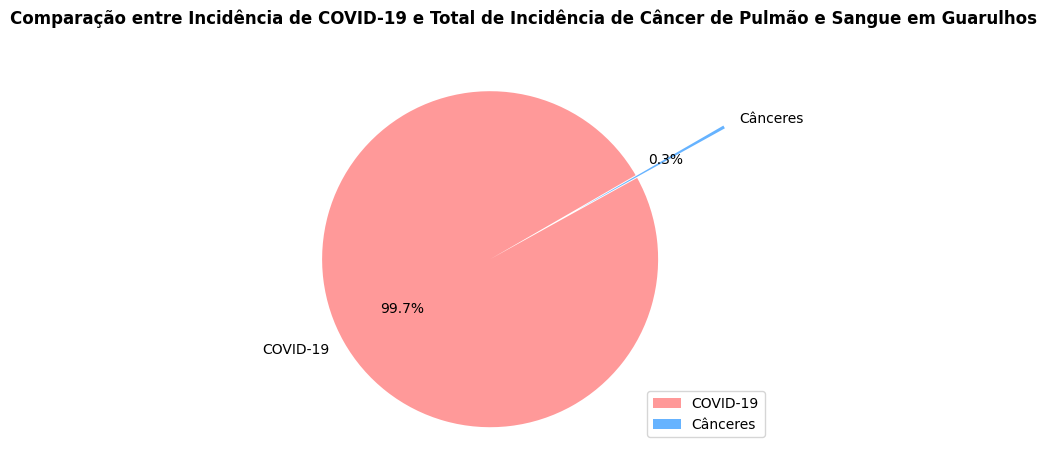

In [39]:
somaC34 = dfCovidGuarulhos['C34'].sum()
somaC91 = dfCovidGuarulhos['C91'].sum()
somaC92 = dfCovidGuarulhos['C92'].sum()

TotalCanceresGuarulhos = somaC34 + somaC91 + somaC92

somaU07_1 = dfCovidGuarulhos['U07.1'].sum()


values = [somaU07_1, TotalCanceresGuarulhos]
labels = ['COVID-19', 'Cânceres']
colors = ['#ff9999', '#66b3ff']
explode = (0.5, 0.1)



plt.figure(figsize=(10,10))
plt.figure(facecolor='White')
plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, colors=colors, startangle=30, explode=explode)
plt.title(
    'Comparação entre Incidência de COVID-19 e Total de Incidência de Câncer de Pulmão e Sangue em Guarulhos\n\n', 
    loc='center',
    fontdict={'fontsize':12, 'fontweight':'bold'}
)
plt.legend(labels, loc='lower right')
plt.axis('equal')

plt.show()

<Figure size 1000x1000 with 0 Axes>

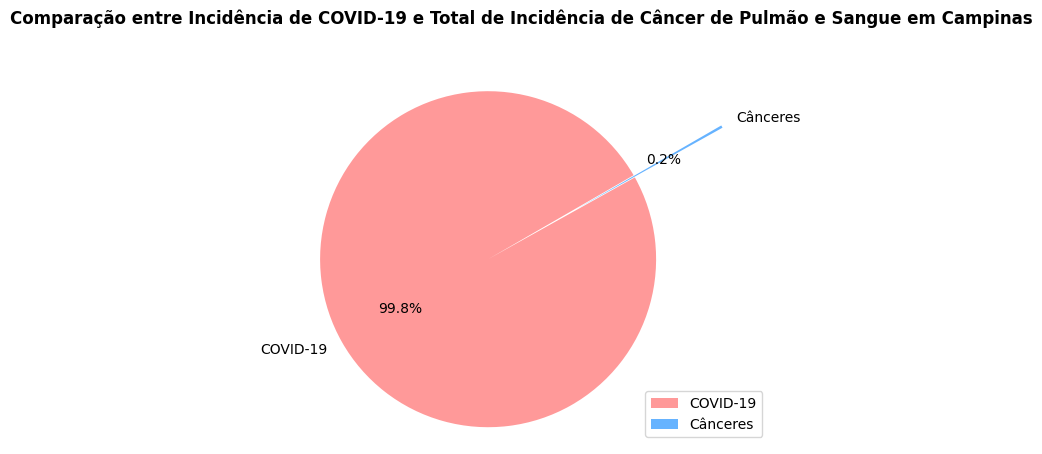

In [40]:
somaC34 = dfCovidCampinas['C34'].sum()
somaC91 = dfCovidCampinas['C91'].sum()
somaC92 = dfCovidCampinas['C92'].sum()

TotalCanceresCampinas = somaC34 + somaC91 + somaC92

somaU07_1 = dfCovidCampinas['U07.1'].sum()


values = [somaU07_1, TotalCanceresCampinas]
labels = ['COVID-19', 'Cânceres']
colors = ['#ff9999', '#66b3ff']
explode = (0.5, 0.1)



plt.figure(figsize=(10,10))
plt.figure(facecolor='White')
plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, colors=colors, startangle=30, explode=explode)
plt.title(
    'Comparação entre Incidência de COVID-19 e Total de Incidência de Câncer de Pulmão e Sangue em Campinas\n\n', 
    loc='center',
    fontdict={'fontsize':12, 'fontweight':'bold'}
)
plt.legend(labels, loc='lower right')
plt.axis('equal')

plt.show()

<Figure size 1000x1000 with 0 Axes>

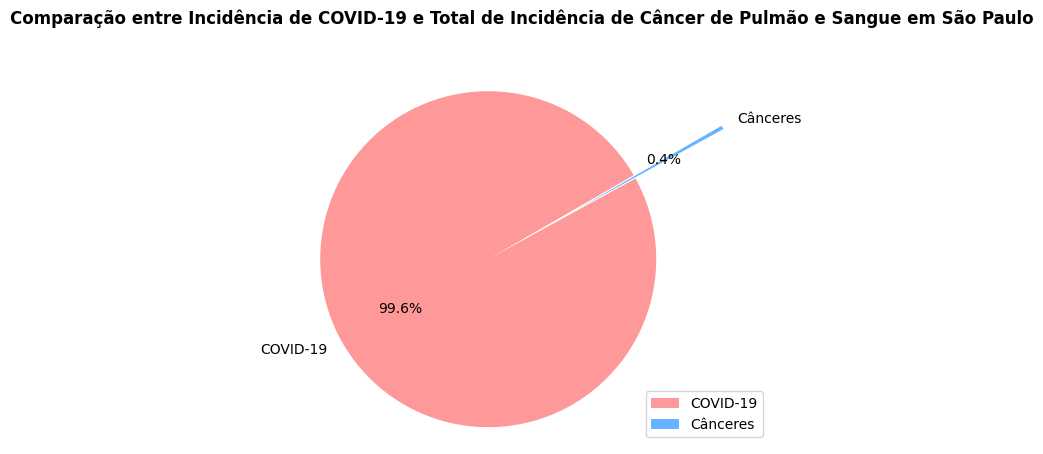

In [41]:
somaC34 = dfCovidSaoPaulo['C34'].sum()
somaC91 = dfCovidSaoPaulo['C91'].sum()
somaC92 = dfCovidSaoPaulo['C92'].sum()

TotalCanceresSaoPaulo = somaC34 + somaC91 + somaC92

somaU07_1 = dfCovidSaoPaulo['U07.1'].sum()


values = [somaU07_1, TotalCanceresSaoPaulo]
labels = ['COVID-19', 'Cânceres']
colors = ['#ff9999', '#66b3ff']
explode = (0.5, 0.1)



plt.figure(figsize=(10,10))
plt.figure(facecolor='White')
plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, colors=colors, startangle=30, explode=explode)
plt.title(
    'Comparação entre Incidência de COVID-19 e Total de Incidência de Câncer de Pulmão e Sangue em São Paulo\n\n', 
    loc='center',
    fontdict={'fontsize':12, 'fontweight':'bold'}
)
plt.legend(labels, loc='lower right')
plt.axis('equal')

plt.show()

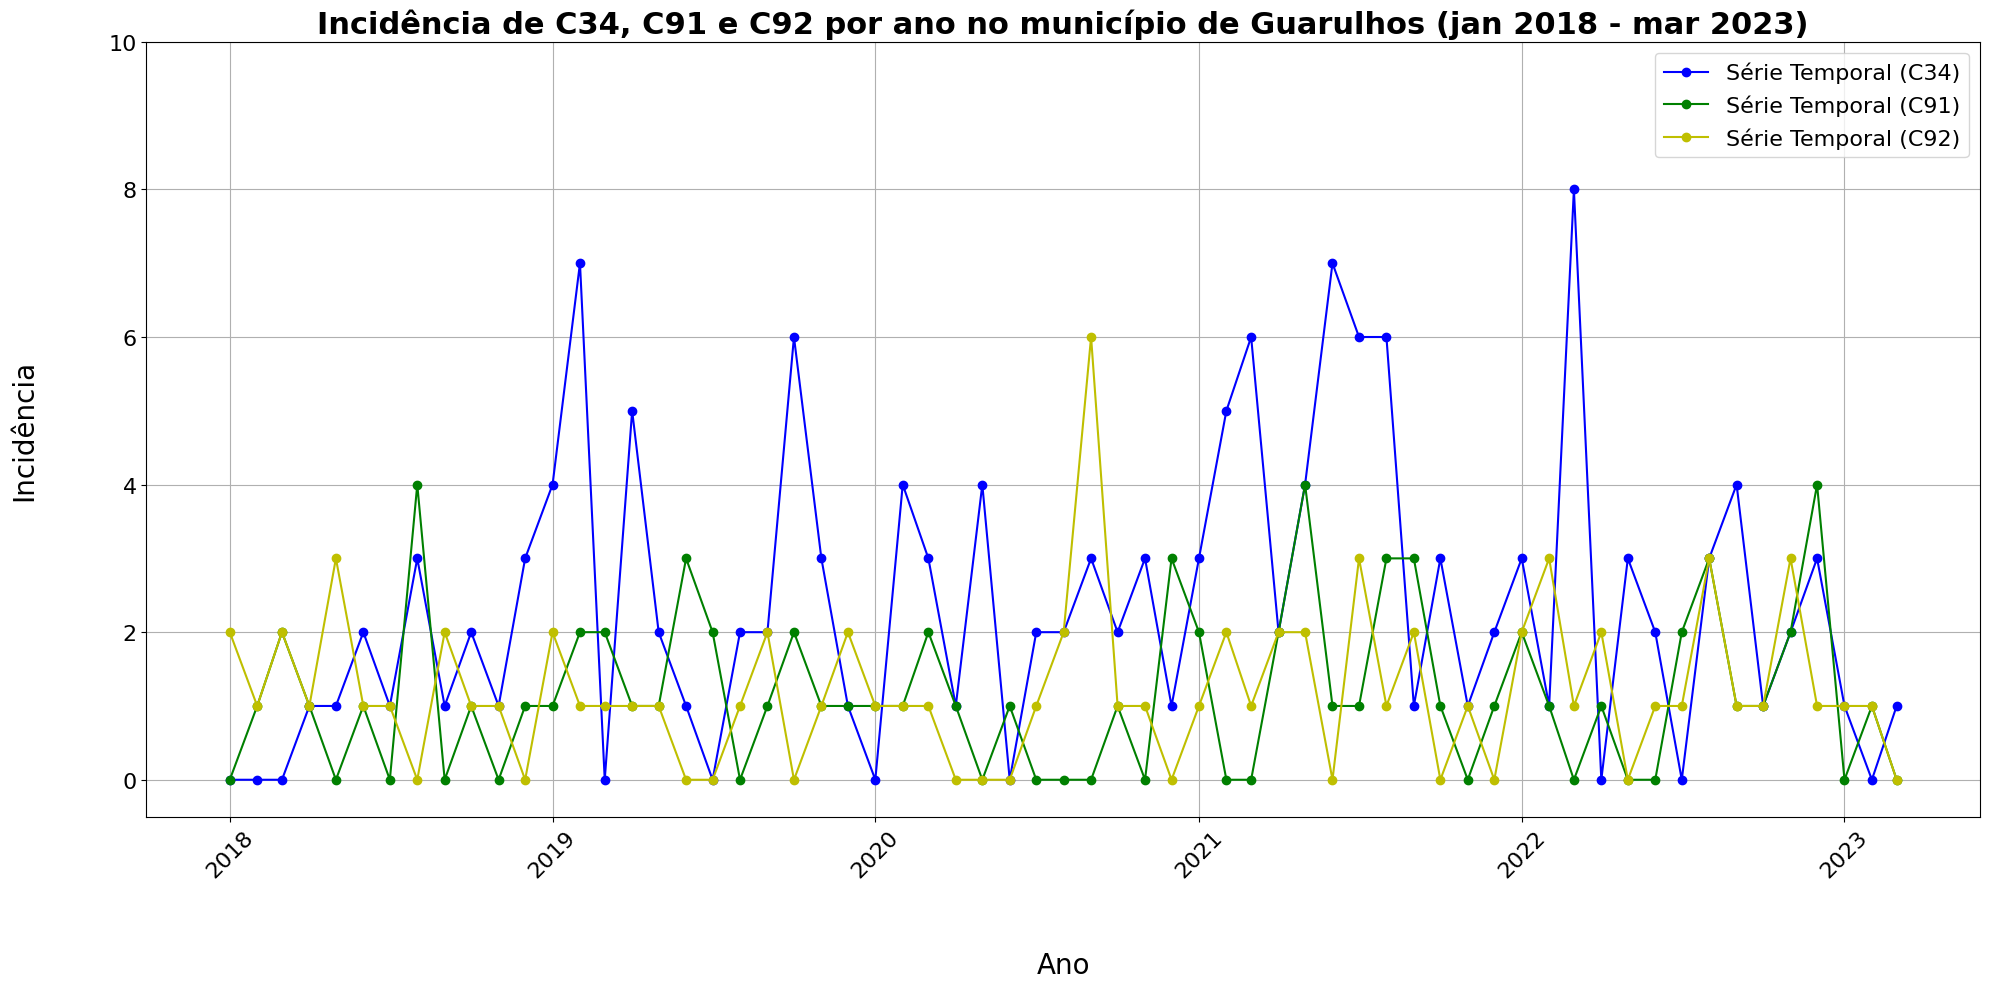

In [42]:
dfCovidGuarulhos['month_year'] = pd.to_datetime(dfCovidGuarulhos['month_year'], format='%m-%Y')
dfCovidGuarulhos = dfCovidGuarulhos.sort_values(by='month_year')

plt.figure(figsize=(20, 10))

# Série Temporal C34
plt.plot(
    dfCovidGuarulhos['month_year'], dfCovidGuarulhos['C34'], 
    marker='o', 
    linestyle='-', 
    color='b', 
    label='Série Temporal (C34)'
)

# Série Temporal C91
plt.plot(
    dfCovidGuarulhos['month_year'], dfCovidGuarulhos['C91'], 
    marker='o', 
    linestyle='-', 
    color='g', 
    label='Série Temporal (C91)'
)

# Série Temporal C92
plt.plot(
    dfCovidGuarulhos['month_year'], dfCovidGuarulhos['C92'], 
    marker='o', 
    linestyle='-', 
    color='y', 
    label='Série Temporal (C92)'
)



plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.ylim(-0.5, 10)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('\n\nAno', fontsize=20)
plt.ylabel('Incidência\n\n', fontsize=20)
plt.title('Incidência de C34, C91 e C92 por ano no município de Guarulhos (jan 2018 - mar 2023)', fontsize=22, fontweight='bold')
plt.legend(fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

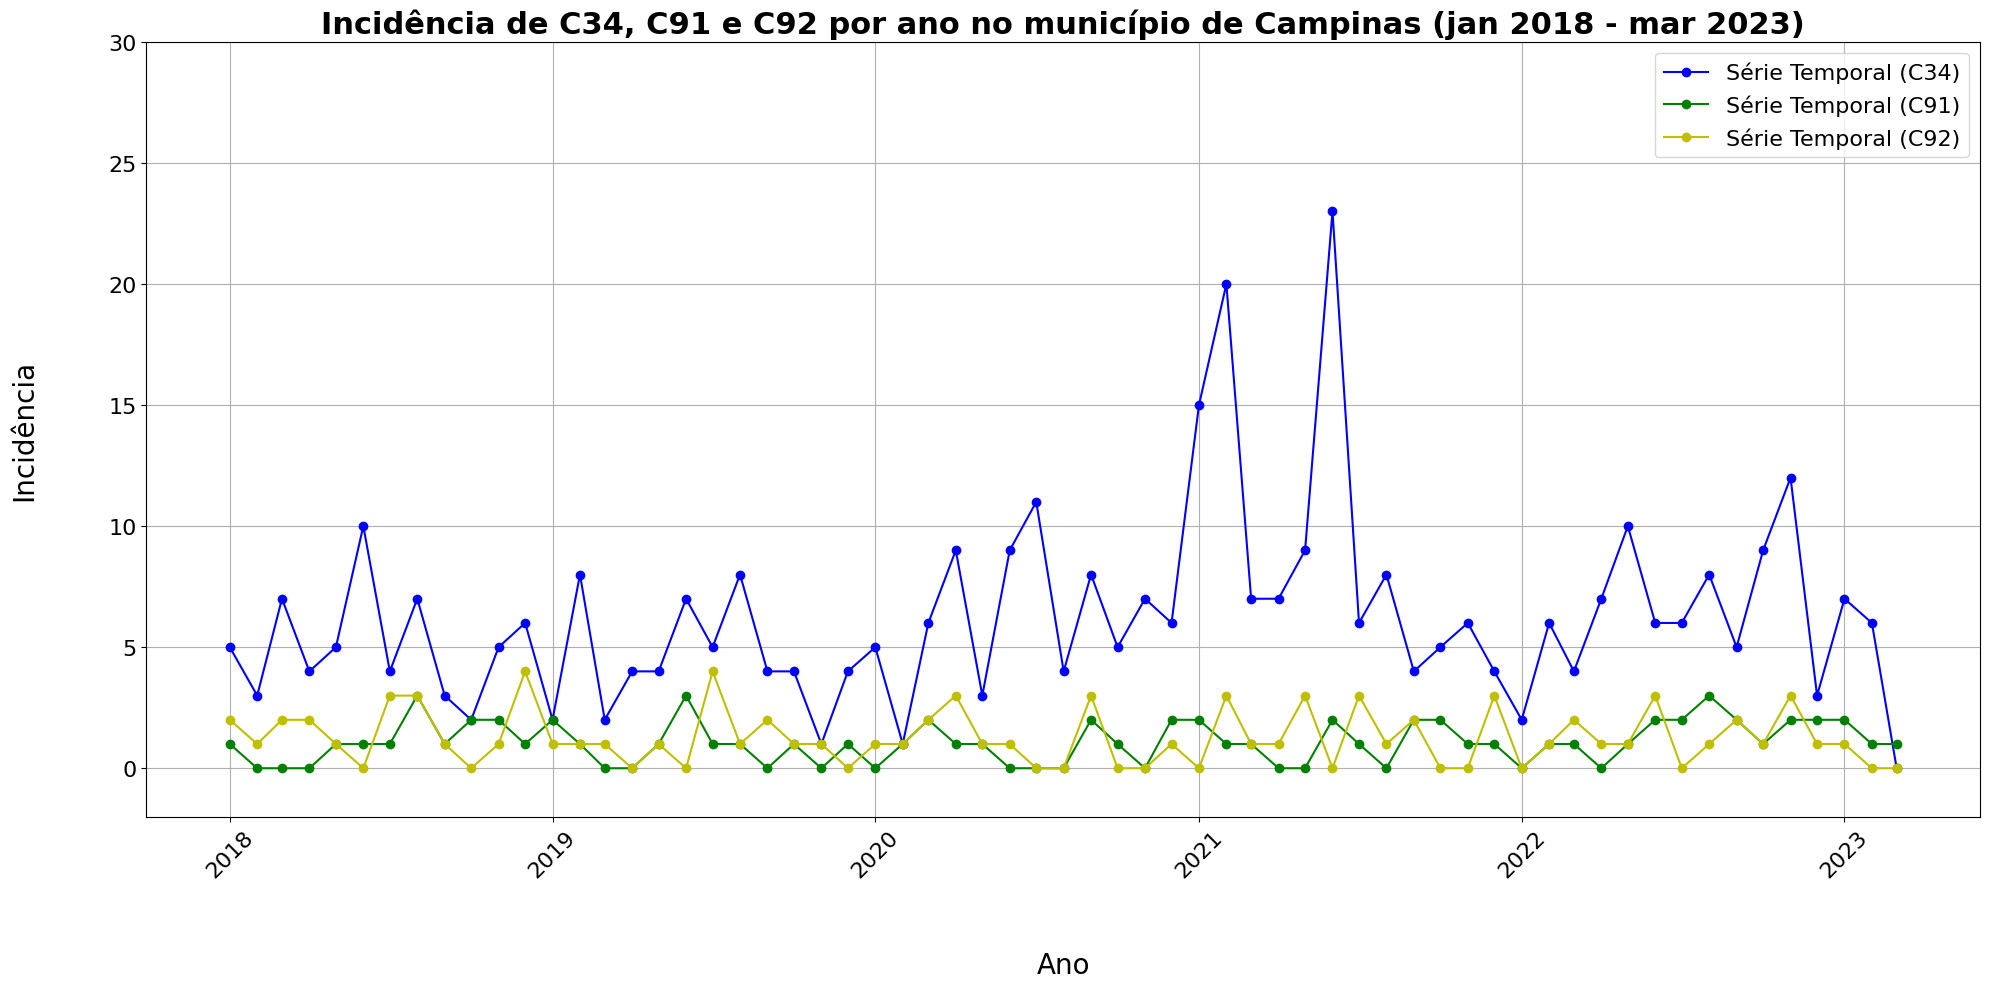

In [43]:
dfCovidCampinas['month_year'] = pd.to_datetime(dfCovidCampinas['month_year'], format='%m-%Y')
dfCovidCampinas = dfCovidCampinas.sort_values(by='month_year')

plt.figure(figsize=(20, 10))

# Série Temporal C34
plt.plot(
    dfCovidCampinas['month_year'], dfCovidCampinas['C34'], 
    marker='o', 
    linestyle='-', 
    color='b', 
    label='Série Temporal (C34)'
)

# Série Temporal C91
plt.plot(
    dfCovidCampinas['month_year'], dfCovidCampinas['C91'], 
    marker='o', 
    linestyle='-', 
    color='g', 
    label='Série Temporal (C91)'
)

# Série Temporal C92
plt.plot(
    dfCovidCampinas['month_year'], dfCovidCampinas['C92'], 
    marker='o', 
    linestyle='-', 
    color='y', 
    label='Série Temporal (C92)'
)



plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.ylim(-2, 30)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('\n\nAno', fontsize=20)
plt.ylabel('Incidência\n\n', fontsize=20)
plt.title('Incidência de C34, C91 e C92 por ano no município de Campinas (jan 2018 - mar 2023)', fontsize=22, fontweight='bold')
plt.legend(fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

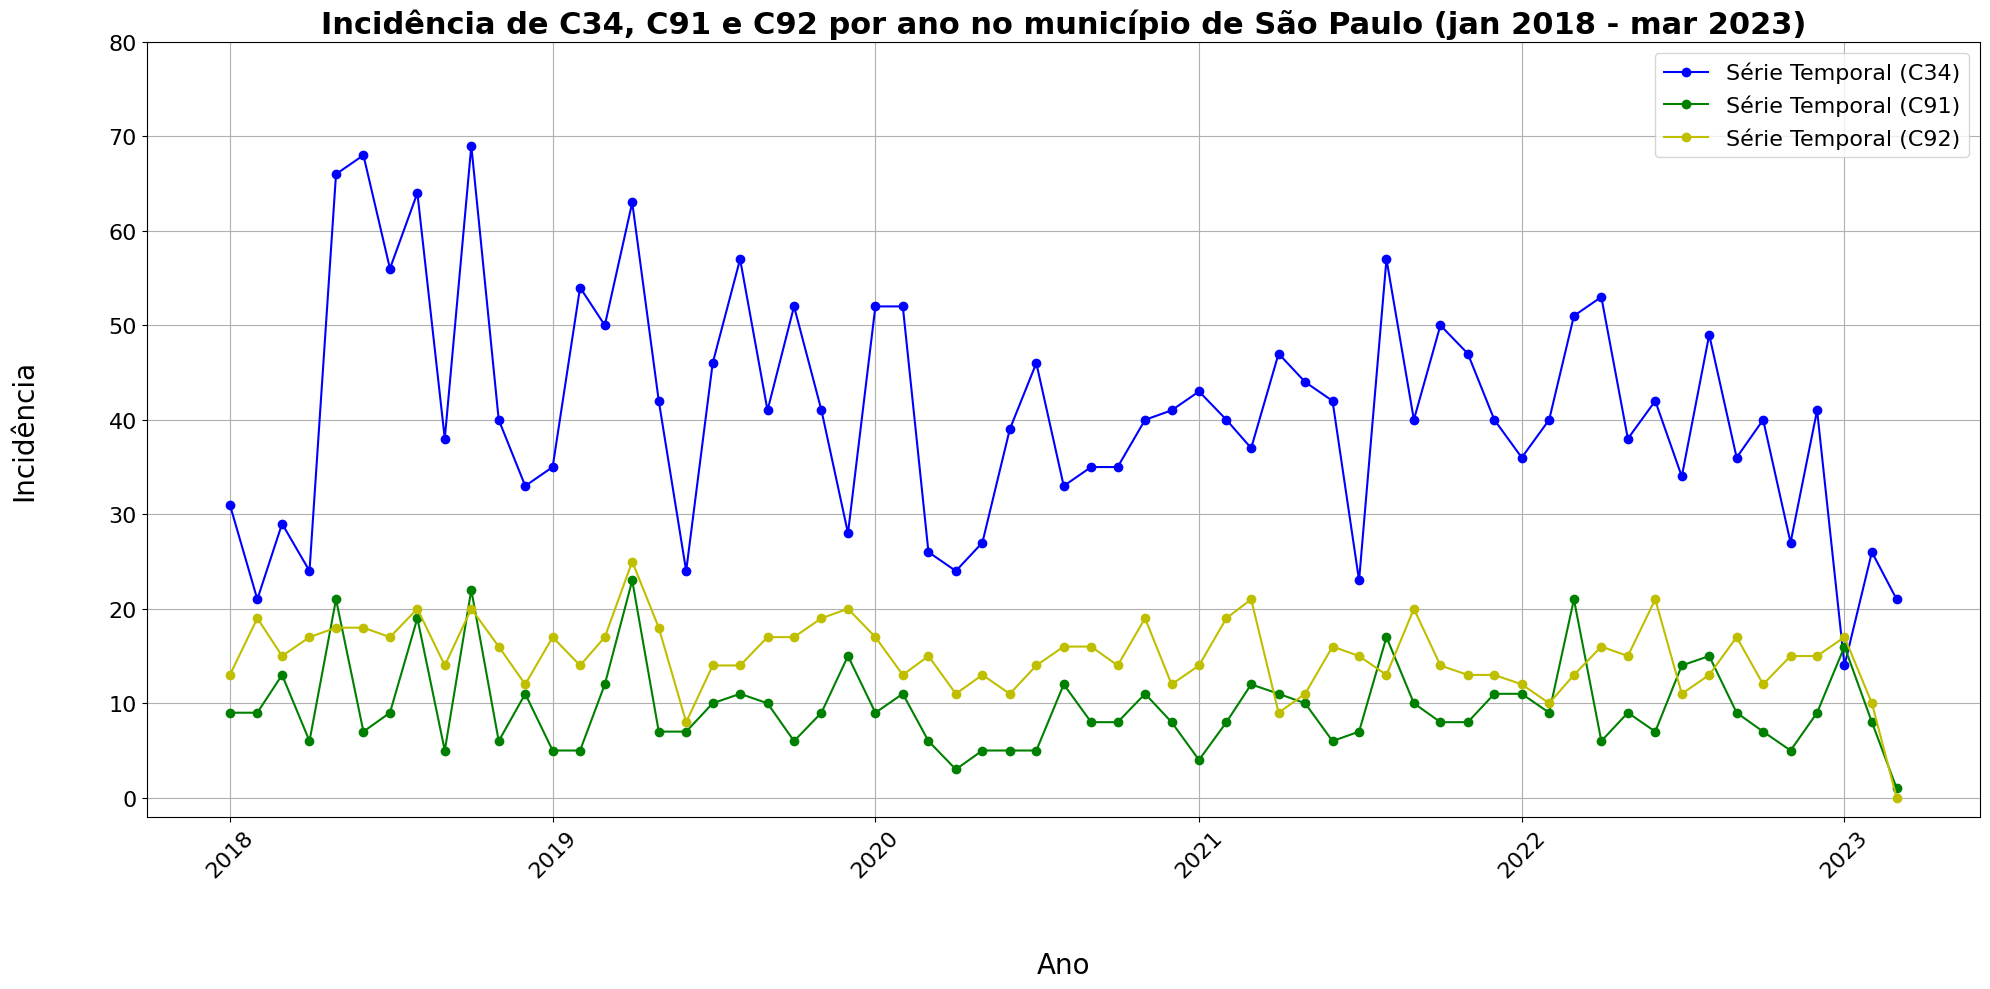

In [44]:
dfCovidSaoPaulo['month_year'] = pd.to_datetime(dfCovidSaoPaulo['month_year'], format='%m-%Y')
dfCovidSaoPaulo = dfCovidSaoPaulo.sort_values(by='month_year')

plt.figure(figsize=(20, 10))

# Série Temporal C34
plt.plot(
    dfCovidSaoPaulo['month_year'], dfCovidSaoPaulo['C34'], 
    marker='o', 
    linestyle='-', 
    color='b', 
    label='Série Temporal (C34)'
)

# Série Temporal C91
plt.plot(
    dfCovidSaoPaulo['month_year'], dfCovidSaoPaulo['C91'], 
    marker='o', 
    linestyle='-', 
    color='g', 
    label='Série Temporal (C91)'
)

# Série Temporal C92
plt.plot(
    dfCovidSaoPaulo['month_year'], dfCovidSaoPaulo['C92'], 
    marker='o', 
    linestyle='-', 
    color='y', 
    label='Série Temporal (C92)'
)



plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.ylim(-2, 80)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('\n\nAno', fontsize=20)
plt.ylabel('Incidência\n\n', fontsize=20)
plt.title('Incidência de C34, C91 e C92 por ano no município de São Paulo (jan 2018 - mar 2023)', fontsize=22, fontweight='bold')
plt.legend(fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

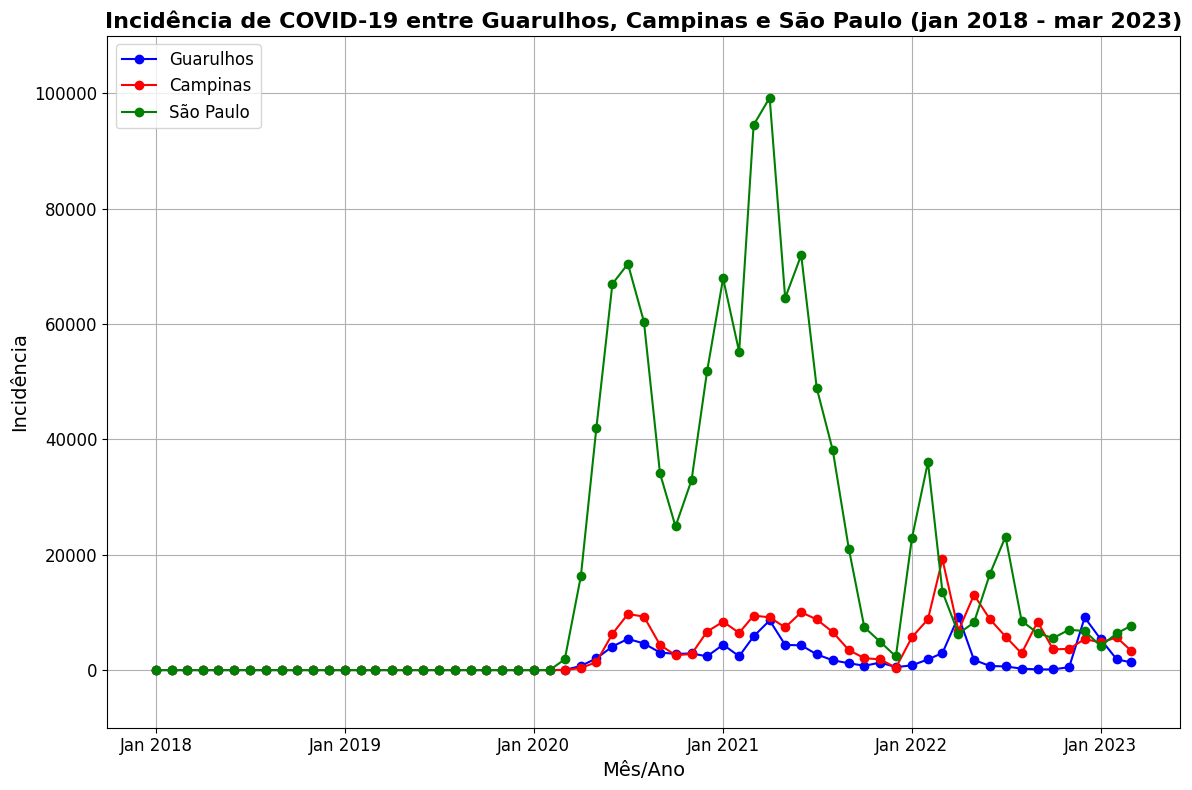

In [45]:
plt.figure(figsize=(12, 8))  # Redimensione a figura conforme necessário

# Série Temporal Guarulhos (U07.1)
plt.plot(
    dfCovidGuarulhos['month_year'], dfCovidGuarulhos['U07.1'], 
    marker='o', 
    linestyle='-', 
    color='blue',  
    label='Guarulhos'
)

# Série Temporal Campinas (U07.1)
plt.plot(
    dfCovidCampinas['month_year'], dfCovidCampinas['U07.1'], 
    marker='o', 
    linestyle='-', 
    color='red',
    label='Campinas'
)

# Série Temporal São Paulo (U07.1)
plt.plot(
    dfCovidSaoPaulo['month_year'], dfCovidSaoPaulo['U07.1'], 
    marker='o', 
    linestyle='-',
    color='green',
    label='São Paulo'
)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.ylim(-10000, 110000)
plt.xticks(rotation=0, fontsize=12)  # Rotação 0 para rótulos de mês no eixo x
plt.yticks(fontsize=12)
plt.xlabel('Mês/Ano', fontsize=14)
plt.ylabel('Incidência', fontsize=14)
plt.title('Incidência de COVID-19 entre Guarulhos, Campinas e São Paulo (jan 2018 - mar 2023)', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


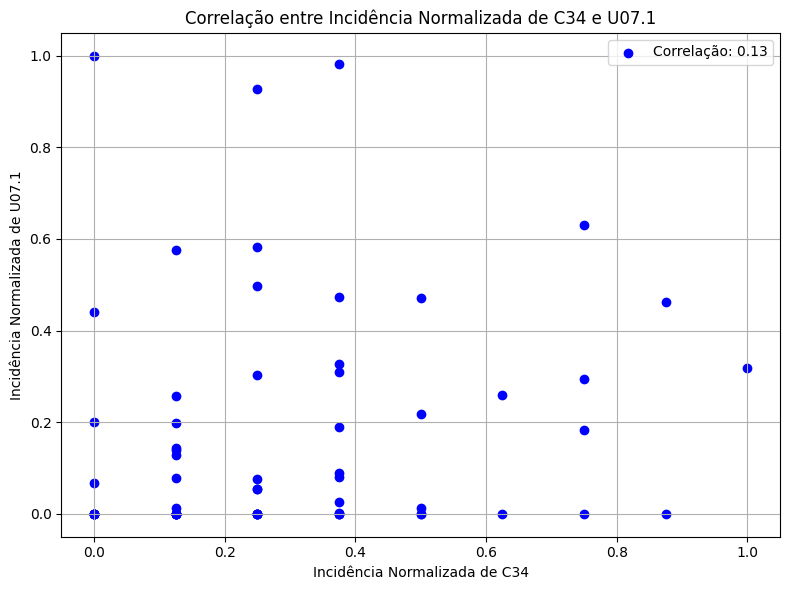

In [46]:
# Normalização dos dados (escala 0 a 1)
C34_normalizado = (dfCovidGuarulhos['C34'] - dfCovidGuarulhos['C34'].min()) / (dfCovidGuarulhos['C34'].max() - dfCovidGuarulhos['C34'].min())
U07_1_normalizado = (dfCovidGuarulhos['U07.1'] - dfCovidGuarulhos['U07.1'].min()) / (dfCovidGuarulhos['U07.1'].max() - dfCovidGuarulhos['U07.1'].min())

# Cálculo da correlação entre as séries normalizadas
correlacao = C34_normalizado.corr(U07_1_normalizado)

# Criação do gráfico de dispersão
plt.figure(figsize=(8, 6))

plt.scatter(C34_normalizado, U07_1_normalizado, color='b')
plt.xlabel('Incidência Normalizada de C34')
plt.ylabel('Incidência Normalizada de U07.1')
plt.title('Correlação entre Incidência Normalizada de C34 e U07.1')
plt.legend([f'Correlação: {correlacao:.2f}'], loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Conclusão Após Interpretação dos Resultados:

Com base nos resultados obtidos após a interpretação dos dados, é possível concluir que os dados disponíveis para esta análise não demonstram qualquer relação entre o número de casos de COVID-19 e o desenvolvimento de cânceres de pulmão e de sangue. Apenas o número de incidentes não oferece uma base sólida para tirar conclusões adequadas sobre o impacto da COVID-19 nesses problemas de saúde. Seria necessário uma análise mais abrangente de diversos outros conjuntos de dados para obter uma análise mais precisa sobre o assunto. Em resumo, com os dados apresentados aqui, não foi possível identificar qualquer relação.